In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import sys
sys.path.append('../../')

import tensorflow as tf
# tf.enable_eager_execution()
from tensorflow import gfile
import numpy as np
from tgs import data
from tgs import post_process as pp
import time
from matplotlib import pyplot as plt
from skimage import io
from skimage import morphology

np.set_printoptions(suppress=True,linewidth=np.nan,threshold=np.nan)

/home/jfaath/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
preds1 = np.load('../training-runs/resnetunet-21/submission/prediction-ELECTRIC-BOOGALOO-20180829-005727.npy')
preds2 = np.load('../training-runs/resnetunet-21/submission/prediction-X-20180828-213811.npy')
ids = np.load('../training-runs/resnetunet-21/submission/prediction-X-20180828-212650-ids.npy')

pred1 sum: 3560
pred2 sum: 3629


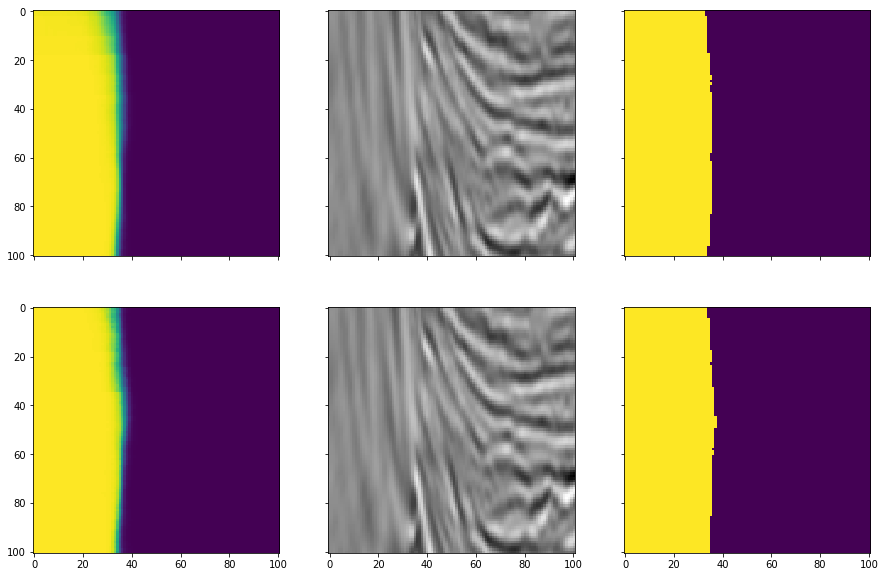

In [49]:
thresh = 0.4
idx = 187
#idx = idx_lb[27]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
ax = axes.ravel()

img = io.imread(f'../data/test/images/{ids[idx]}.png')
ax[0].imshow(preds1[idx])
ax[1].imshow(img)
p1t = pp.threshold(preds1[idx], prob_thresh=thresh)
ax[2].imshow(p1t)

ax[3].imshow(preds2[idx])
ax[4].imshow(img)
p2t = pp.threshold(preds2[idx], prob_thresh=thresh)
ax[5].imshow(p2t)

print(f'pred1 sum: {np.sum(p1t)}')
print(f'pred2 sum: {np.sum(p2t)}')

small count: 158
label count: 445


(array([17555.,   256.,   125.,    25.,    18.,    13.,     2.,     4.,     0.,     2.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

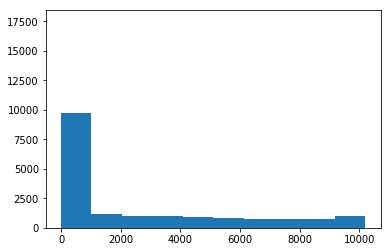

In [73]:
small = 20
label = 2
sizes = []
labels = []
for pred in preds22:
    pred = pred > thresh
    sizes.append(np.sum(pred))
    lbl = morphology.label(pred)
    labels.append(np.max(lbl))
    

sizes = np.asarray(sizes)
idx_sm = np.where(np.logical_and(sizes > 0, sizes < small))[0]
print(f'small count: {len(idx_sm)}')

labels = np.asarray(labels)
idx_lb = np.where(labels > label)[0]
print(f'label count: {len(idx_lb)}')

plt.hist(sizes)
plt.hist(labels)

5


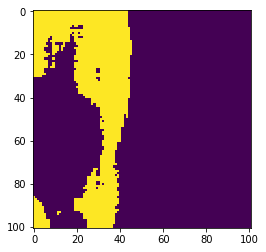

In [96]:
print(np.max(morphology.label(preds22[idx] > thresh)))
plt.imshow(preds22[idx] > thresh)

In [91]:
idx

412